In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 读取jsonl文件 
with open('./db/face_metadata.jsonl', 'r') as f:
    face_metadata = pd.read_json(f, lines=True)

face_metadata.shape

(2201, 6)

In [3]:
face_metadata

,face_id,first_seen,last_seen,appearances,count,face_image
0,0,20250307122924.jpg,20250307122924.jpg,[20250307122924.jpg],1,face_0.jpg
1,1,20250307122924.jpg,20250307122925.jpg,"[20250307122924.jpg, 20250307122925.jpg]",2,face_1.jpg
2,2,20250307122924.jpg,20250307122924.jpg,[20250307122924.jpg],1,face_2.jpg
3,3,20250307122924.jpg,20250307122924.jpg,[20250307122924.jpg],1,face_3.jpg
4,4,20250307122924.jpg,20250307122924.jpg,[20250307122924.jpg],1,face_4.jpg
...,...,...,...,...,...,...
2196,2196,20250307193358.jpg,20250307193358.jpg,[20250307193358.jpg],1,face_2196.jpg
2197,2197,20250307193400.jpg,20250307193400.jpg,[20250307193400.jpg],1,face_2197.jpg
2198,2198,20250307193401.jpg,20250307193401.jpg,[20250307193401.jpg],1,face_2198.jpg
2199,2199,20250307193402.jpg,20250307193402.jpg,[20250307193402.jpg],1,face_2199.jpg


In [4]:
# 处理图片名为时间
def to_time(file_name):
    return int(file_name.split('.')[0])

# 对first_seen、last_seen列进行处理
face_metadata['first_seen'] = face_metadata['first_seen'].apply(to_time)
face_metadata['last_seen'] = face_metadata['last_seen'].apply(to_time)

face_metadata

,face_id,first_seen,last_seen,appearances,count,face_image
0,0,20250307122924,20250307122924,[20250307122924.jpg],1,face_0.jpg
1,1,20250307122924,20250307122925,"[20250307122924.jpg, 20250307122925.jpg]",2,face_1.jpg
2,2,20250307122924,20250307122924,[20250307122924.jpg],1,face_2.jpg
3,3,20250307122924,20250307122924,[20250307122924.jpg],1,face_3.jpg
4,4,20250307122924,20250307122924,[20250307122924.jpg],1,face_4.jpg
...,...,...,...,...,...,...
2196,2196,20250307193358,20250307193358,[20250307193358.jpg],1,face_2196.jpg
2197,2197,20250307193400,20250307193400,[20250307193400.jpg],1,face_2197.jpg
2198,2198,20250307193401,20250307193401,[20250307193401.jpg],1,face_2198.jpg
2199,2199,20250307193402,20250307193402,[20250307193402.jpg],1,face_2199.jpg


In [5]:
# 查看count分布
face_metadata['count'].value_counts()

count
1     1914
2      191
3       41
4       23
5        9
7        8
8        3
6        3
20       2
19       1
15       1
36       1
11       1
12       1
59       1
10       1
Name: count, dtype: int64

In [6]:
# 只保留count>1的数据，拷贝到新的dataframe
face_metadata = face_metadata[face_metadata['count'] > 1].copy()

In [7]:
face_metadata

,face_id,first_seen,last_seen,appearances,count,face_image
1,1,20250307122924,20250307122925,"[20250307122924.jpg, 20250307122925.jpg]",2,face_1.jpg
5,5,20250307122925,20250307122926,"[20250307122925.jpg, 20250307122926.jpg]",2,face_5.jpg
8,8,20250307122927,20250307122928,"[20250307122927.jpg, 20250307122928.jpg]",2,face_8.jpg
13,13,20250307122929,20250307122933,"[20250307122929.jpg, 20250307122930.jpg, 20250...",4,face_13.jpg
16,16,20250307122930,20250307132353,"[20250307122930.jpg, 20250307132353.jpg]",2,face_16.jpg
...,...,...,...,...,...,...
2094,2094,20250307193007,20250307193008,"[20250307193007.jpg, 20250307193008.jpg]",2,face_2094.jpg
2105,2105,20250307193016,20250307193017,"[20250307193016.jpg, 20250307193017.jpg]",2,face_2105.jpg
2109,2109,20250307193021,20250307193022,"[20250307193021.jpg, 20250307193022.jpg]",2,face_2109.jpg
2114,2114,20250307193039,20250307193338,"[20250307193039.jpg, 20250307193338.jpg]",2,face_2114.jpg


In [ ]:
# 重新计算first_seen、last_seen
face_metadata['first_seen'] = face_metadata['appearances'].apply(lambda x: min([to_time(i) for i in x]))
face_metadata['last_seen'] = face_metadata['appearances'].apply(lambda x: max([to_time(i) for i in x]))

In [9]:
# 计算时间跨度
face_metadata['time_span'] = face_metadata['last_seen'] - face_metadata['first_seen']

# 归一化处理
face_metadata['normalized_time_span'] = (face_metadata['time_span'] - face_metadata['time_span'].min()) / (face_metadata['time_span'].max() - face_metadata['time_span'].min())
face_metadata['normalized_count'] = (face_metadata['count'] - face_metadata['count'].min()) / (face_metadata['count'].max() - face_metadata['count'].min())

# 去除异常值
face_metadata = face_metadata[face_metadata['normalized_count'] > 0].copy()

# 计算时间跨度指标
face_metadata['time_span_metric'] = face_metadata['normalized_time_span'] / face_metadata['normalized_count']

face_metadata[['face_id', 'time_span', 'normalized_time_span', 'normalized_count', 'time_span_metric']]

,face_id,time_span,normalized_time_span,normalized_count,time_span_metric
13,13,4,0.000030,0.035088,0.000851
22,22,30176,0.300306,0.035088,8.558708
26,26,3,0.000020,0.035088,0.000567
32,32,40204,0.400105,0.298246,1.341530
35,35,40253,0.400593,0.228070,1.756447
...,...,...,...,...,...
1802,1802,9737,0.096894,0.087719,1.104591
1812,1812,9733,0.096854,0.017544,5.520686
1969,1969,1718,0.017088,0.017544,0.974005
2087,2087,4,0.000030,0.052632,0.000567


In [10]:
face_metadata['time_span_metric'].describe()

count    96.000000
mean      2.897337
std       6.823565
min       0.000567
25%       0.000780
50%       0.015316
75%       1.370159
max      34.458335
Name: time_span_metric, dtype: float64

(array([63.,  2.,  3.,  4.,  2.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  4.,  1.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([5.67271424e-04, 3.45144953e-01, 6.89722634e-01, 1.03430032e+00,
        1.37887800e+00, 1.72345568e+00, 2.06803336e+00, 2.41261104e+00,
        2.75718872e+00, 3.10176640e+00, 3.44634408e+00, 3.79092177e+00,
        4.13549945e+00, 4.48007713e+00, 4.82465481e+00, 5.16923249e+00,
        5.51381017e+00, 5.85838785e+00, 6.20296554e+00, 6.54754322e+00,
        6.89212090e+00, 7.23669858e+00, 7.58127626e+00, 7.92585394e+00,
  

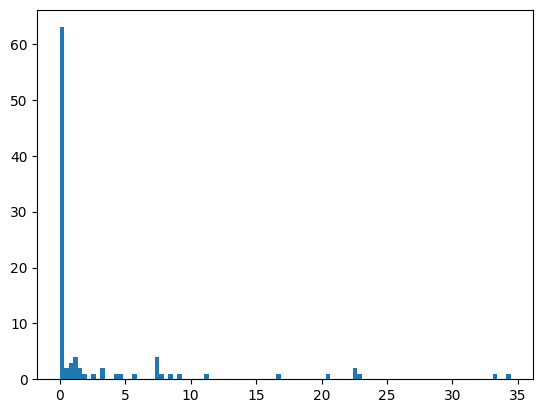

In [11]:
# time_span_metric分布

plt.hist(face_metadata['time_span_metric'], bins=100)

In [ ]:
# 从大到小排序
face_metadata_sort = face_metadata.sort_values('time_span_metric', ascending=False)

face_metadata_sort


,face_id,first_seen,last_seen,appearances,count,face_image,time_span,normalized_time_span,normalized_count,time_span_metric
374,374,20250307132610,20250307193355,"[20250307132610.jpg, 20250307133335.jpg, 20250...",3,face_374.jpg,60745,0.604532,0.017544,34.458335
1270,1270,20250307132401,20250307191039,"[20250307132401.jpg, 20250307182306.jpg, 20250...",3,face_1270.jpg,58638,0.583563,0.017544,33.263095
883,883,20250307092659,20250307132915,"[20250307132915.jpg, 20250307092659.jpg, 20250...",3,face_883.jpg,40256,0.400623,0.017544,22.835511
563,563,20250307092756,20250307132713,"[20250307132713.jpg, 20250307092756.jpg, 20250...",3,face_563.jpg,39957,0.397647,0.017544,22.665897
1160,1160,20250307092804,20250307132359,"[20250307092804.jpg, 20250307132358.jpg, 20250...",3,face_1160.jpg,39555,0.393647,0.017544,22.437854
...,...,...,...,...,...,...,...,...,...,...
598,598,20250307132730,20250307132733,"[20250307132730.jpg, 20250307132731.jpg, 20250...",4,face_598.jpg,3,0.000020,0.035088,0.000567
617,617,20250307132735,20250307132737,"[20250307132735.jpg, 20250307132736.jpg, 20250...",3,face_617.jpg,2,0.000010,0.017544,0.000567
625,625,20250307132737,20250307132739,"[20250307132737.jpg, 20250307132738.jpg, 20250...",3,face_625.jpg,2,0.000010,0.017544,0.000567
760,760,20250307132828,20250307132830,"[20250307132828.jpg, 20250307132829.jpg, 20250...",3,face_760.jpg,2,0.000010,0.017544,0.000567


In [ ]:
# 按time_span命名，将图片拷贝到新的文件夹
import os
import shutil

# 创建新文件夹
os.makedirs('./db/faces_time_span', exist_ok=True)

# 拷贝图片
for index, row in face_metadata_sort.iterrows():
    for file_name in row['appearances']:
        shutil.copy(f'./faces/face_{row["face_id"]}.jpg', f'./db/faces_time_span/{row["time_span"]}_{row["face_id"]}.jpg')